# Proyecto 2 - Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos

La estructura utilizada para el desarrollo del proyecto es:

## Parte A: Consideraciones Generales y Transformación de Datos
* Comenzamos con un apartado para comentar sobre algunas definiciones y herramientas que se utilizan a lo largo de todo el Proyecto. 
* Repasamos el mejor modelo obtenido en el Proyecto 1 y su desempeño. Se realiza una primera iteración rápida modelando RamdomForest, para comparar el desempeño entre un modelo robusto, sin demasiado análisis en el dataset, y las métricas obtenidas en el mejor modelo del Proyecto 1. 
* Se profundiza en el análisis del dataset buscando corregir inconvenientes de valores faltantes y outliers. 
* Se realiza una segunda iteración modelando el mejor modelo del Proyecto 1 y un modelo RamdomForest, para interpretar cómo impacta el tratamiento previo del dataset.

**Objetivo:** contar con un dataset completo y ajustado para profundizar en el modelado. 

## Parte B: Modelos Avanzados 
* Se propone una tercera iteración comparando 3 modelos de los más robustos y comparar el desempeño entre ambos. 
* Se realiza una optimización de hiperparametros para estos 3 modelos, analizando el desempeño obtenido. 
* Se elige y justifica un modelo en particular. 

**Objetivo:** encontrar y elegir el modelo con mejor desempeño. 

## Parte C: Interpretación de modelos y resultados obtenidos
* Se extraen conclusiones del trabajo realizado. 
 
## Anexo: Análisis y comparación utilizando otras transformaciones. 
* Se propone realizar tratamientos de Outliers, Valores Faltantes y Encoding directamente sobre el dataset, sin demasiado análisis exhaustivo. 
* Modelamos este nuevo dataset con el mejor modelo obtenido hasta el momento. 
* Se analizan los resultados y extraemos conclusiones. 

**Objetivo:** comparar y entender el desempeño de nuestro modelo utilizando un dataset como el obtenido en el apartado A, contra un dataset transformado con técnicas de Outliers, Valores Faltantes y Encoding convencionales. 
  


---

<br />

## Parte A: Consideraciones Generales y Transformación de Datos 
<br />

---


Importamos librerias

In [2]:
# Generales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import sklearn
import warnings

In [3]:
# para Modelos

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.svm import SVR

from sklearn.impute import SimpleImputer

In [4]:
# para metricas 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<br />

---


### Consideraciones Generales  

A lo largo de todo el proyecto se va a considerar el mismo criterio de filtrado que se utilizó en el Proyecto 1, para poder realizar una comparación más justas entre el rendimiento de los modelos.  
Para esto se va a considerar solamente:  
* propiedades publicadas en Capital Federal.
* que sean de tipo Departamento, PH y Casa.  

Para el modelado:  
* en todos los casos vamos a utilizar una función que nos ayude a entender el rendimiento del modelo (función utilizada en el Proyecto 1).  
* se hará uso del método PipeLine para aplicar las transformaciones y el modelo en sí.  
* en las transformaciones vamos a aplicar StandardScaler en las variables numéricas. Esta transformación nos ayuda a normalizar los valores de las muestras, para conseguir que las variables numéricas tengan una distribución de valores más parecida a una normal.  
* vamos a aplicar OneHotEncoder para transformar variables categóricas. De esta manera, vamos a poder transformar y convertir a números la información correspondiente de variables que no lo son.  

Comencemos con el analisis.


Resultados de modelos obtenidos en el Proyecto 1

In [5]:
con = {"Modelo":["Benchmark", "Árbol de decisión Inicial", "Vecinos más cercanos Inicial", "Árbol de decisión Optimo", "Vecinos más cercanos Optimo"], 
           "Hiper-parámetros":["-", "profundidad máxima = 3", "número de vecinos = 5", "profundidad máxima = 17", "número de vecinos = 3"], 
           "RMSE (test)":["~268000", "~194000", "~155000", "~146000", "~152000"], "R2 (test)":["0.22991", "0.58521", "0.73695", "0.76643", "0.74611"]}
pd.DataFrame(con)

,Modelo,Hiper-parámetros,RMSE (test),R2 (test)
0,Benchmark,-,~268000,0.22991
1,Árbol de decisión Inicial,profundidad máxima = 3,~194000,0.58521
2,Vecinos más cercanos Inicial,número de vecinos = 5,~155000,0.73695
3,Árbol de decisión Optimo,profundidad máxima = 17,~146000,0.76643
4,Vecinos más cercanos Optimo,número de vecinos = 3,~152000,0.74611


El mejor desempeño lo obtuvimos con un Árbol de Decisión de profudidad 17, con un valor R2 del 76.6%.

### Iteración 1 

Pretendemos realizar una primera iteración sin demasiado análisis de nuestro dataset. 
Se va a mantener el mismo criterio general que en Proyecto 1, como ya se comento anteriormente.

Para esta iteración únicamente se van a descartar todos los valores nulos. 


In [6]:
df_o = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/DS_Proyecto_01_Datos_Properati.csv')
df = df_o.copy()

print('El tamaño del dataset origianl es: ', df.shape)

El tamaño del dataset origianl es:  (146660, 19)


In [7]:
col_drop = ['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type']
df = df.drop(columns=col_drop)

df = df[((df.property_type == 'Departamento') | (df.property_type == 'Casa') | (df.property_type == 'PH')) & (df.l2 == 'Capital Federal')]

col_drop = ['l2']
df = df.drop(columns=col_drop)

print('El tamaño del dataset luego de filtra es: ', df.shape)


El tamaño del dataset luego de filtra es:  (91485, 10)


In [8]:
df = df.dropna()

print('El tamaño del dataset luego de quitar valores Nulos: ', df.shape)

El tamaño del dataset luego de quitar valores Nulos:  (76961, 10)


In [9]:
print('Veamos valores nulos y datos estadísticos del dataset:')
print('\n')
print('Valores Nulos: ')
print(df.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(df.describe(include=np.object))
print(df.describe())


Veamos valores nulos y datos estadísticos del dataset:


Valores Nulos: 
lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64


Datos estadísticos: 
             l3 property_type
count     76961         76961
unique       57             3
top     Palermo  Departamento
freq      11182         65485
                lat           lon         rooms      bedrooms     bathrooms  \
count  76961.000000  76961.000000  76961.000000  76961.000000  76961.000000   
mean     -34.598323    -58.434845      3.005223      1.998857      1.538610   
std        0.023399      0.035745      1.306747      1.051604      0.838084   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.612203    -58.457343      2.000000      1.000000      1.000000   
50%      -34.598713    -58.432771      3.000000      2.00

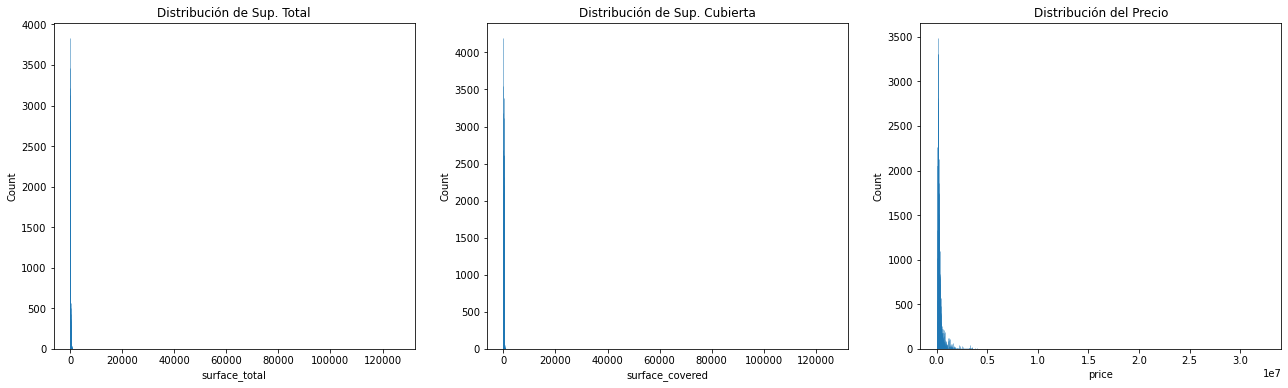

In [10]:
plt.figure(figsize=(22,6))

plt.subplot(1,3,1)
sns.histplot(data=df, x='surface_total', fill=False)
plt.title('Distribución de Sup. Total')

plt.subplot(1,3,2)
sns.histplot(data=df, x='surface_covered', fill=False)
plt.title('Distribución de Sup. Cubierta')

plt.subplot(1,3,3)
sns.histplot(data=df, x='price', fill=False)
plt.title('Distribución del Precio')

plt.show()

*Si bien no tenemos ningún valor nulo, hemos descartado más de 14.000 (de 91.400 a 76.900) filas de nuestro dataset (15% de datos descartados). Ademas, tenemos variables como `price`, `surface_covered` y `surface_total` que presentan una distribución de valores muy alta, con un grafico de distribucion tipo exponencial, esto puede significar que no estemos teniendo un correcta representación de nuestra población.*

Para realizar el modelado vamos a definir y utilizar: 
* una función que nos ayude a evaluar todos los modelos que probemos, permitiendo comparar el error RMSE y R2 tanto en el set de Train, como en Test, y además nos va a mostrar un histograma de errores en “Y - Y_PRED”, junto con un gráfico de dispersión de valores “Y vs Y_PRED”. 
* utilizaremos PipeLine para realizar un escalado de datos (StandardScaler) en las variables numéricas, y un encoding (OneHotEncoder) en las variables categóricas. 
* utilizaremos PipeLine también para realizar el modelado. 


In [11]:
def evaluacion_modelo(X_train, X_test, y_train, y_test, modelo):
    
    print('Modelo a evaluar: ' + str(modelo))
    print('\n')
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Error R Cuadrado en Train: {r2_train}')
    print(f'Error R Cuadrado en Test: {r2_test}')
    print('\n')
    
    
    #log_train = np.sqrt(mean_squared_log_error( y_train, y_train_pred ))
    #log_test = np.sqrt(mean_squared_log_error( y_test, y_test_pred ))
    #print(f'log Train: {log_train}')
    #print(f'log Test: {log_test}')
    #print('\n')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'Test')
    
    plt.xlabel("Errores", fontsize = 12)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.title('Histograma de errores "Y - Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.xlabel("Valores originales del Precio", fontsize = 12)
    plt.ylabel("Valores predichos del Precio", fontsize = 12)
    plt.title('Gráfico de dispersión de valores "Y vs Y_PRED"', fontweight = "black", y=1.05)
    
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()

In [12]:
X = df.drop(columns='price')
#print(X.shape)

y = df.price
#print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X.property_type, random_state=1)

In [13]:
num_t = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_t = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [14]:
num_f = X.select_dtypes(include=['int64', 'float64']).columns
cat_f = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_t, num_f),
        ('cat', cat_t, cat_f)])

In [15]:
################################################################################################
#                                   RamdomForest                                               #
################################################################################################

rf_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', RandomForestRegressor(random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['l3', 'property_type'], dtype='object'))])),
                ('reg', RandomForestRegressor(random_state=1))])


Raíz del error cuadrático medio en Train: 65967.9105307103
Raíz del error cuadrático medio en Test: 91139.76737877086


Error R Cuadrado en T

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


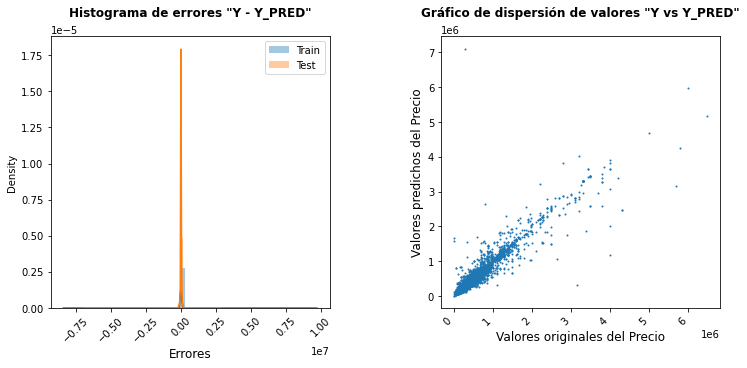

In [16]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_r)

*Con esta primera iteración vemos reflejado:*  
* *por un lado con un modelo como RandomForest se obtiene un desempeño muy alto, con un valor de R2 del 91%, muy superior al 76.6% obtenido en el Proyecto 1.*  
* *más allá del modelo, se están estandarizando valores numéricos, y codificando variables categóricas, que en el Proyecto 1 no se implementaron.*
* *es para destacar que el Histograma de errores “Y - Y_PRED”, si bien está centrado, presenta dispersiones de valores.*  
* *para el gráfico de dispersión de valores “Y - Y_PRED” los puntos no están muy bien alineados con la diagonal, existiendo alguno de ellos con valores muy extremos.*


###  Análisis del Dataset

Para este análisis vamos a abordar dos problemáticas, por un lado intentaremos descartar valores muy extremos en esas variables con alta distribución, por otro vamos a analizar que sucede con los valores nulos en nuestro dataset y como imputarlos. 

In [17]:
df = df_o.copy()

col_drop = ['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type']
df = df.drop(columns=col_drop)

df = df[((df.property_type == 'Departamento') | (df.property_type == 'Casa') | (df.property_type == 'PH')) & (df.l2 == 'Capital Federal')]

col_drop = ['l2']
df = df.drop(columns=col_drop)


In [18]:
print('El tamaño del dataset luego de filtra es: ', df.shape)

El tamaño del dataset luego de filtra es:  (91485, 10)


In [19]:
print('Veamos valores nulos y datos estadísticos del dataset:')
print('\n')
print('Valores Nulos: ')
print(df.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(df.describe(include=np.object))
print(df.describe())

Veamos valores nulos y datos estadísticos del dataset:


Valores Nulos: 
lat                4534
lon                4548
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


Datos estadísticos: 
             l3 property_type
count     91485         91485
unique       57             3
top     Palermo  Departamento
freq      13007         79029
                lat           lon         rooms      bedrooms     bathrooms  \
count  86951.000000  86937.000000  91485.000000  91485.000000  89314.000000   
mean     -34.599081    -58.436002      2.964278      1.960278      1.560147   
std        0.023957      0.036297      1.314704      1.072946      0.860309   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.613757    -58.459605      2.000000      1.000000      1.000000   
50%      -34.599446    -58.

Text(0.5, 1.0, 'Distribución del Precio')

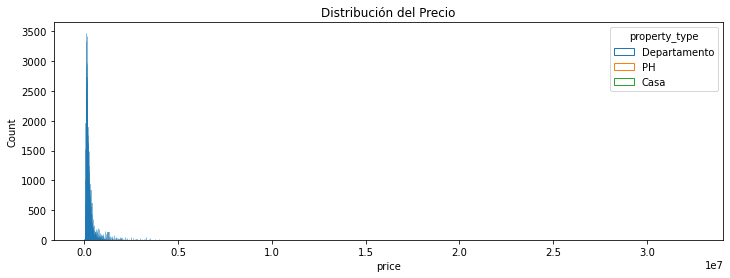

In [20]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='price', hue='property_type', fill=False)
plt.title('Distribución del Precio')

Analizando la variable `price` vemos que no presenta valores nulos, pero como ya habíamos comentado, presenta una distribución de valores muy alta, con un gráfico de distribución tipo exponencial, esto puede significar que no estemos teniendo un correcta representación de nuestra población. 

Para corregir estos valores extremos se tomó como estrategia realizar un análisis de percentiles, ya que de esta forma ajustamos la dispersión sin perder tanta información. 

In [21]:
p95 = np.percentile(df.price, 95)
print('El valor del percentil 95 de la variable `precio` es: ', p95)
#print(df.shape)

print('La cantidad de valores por encima del percentil 95 es: ', df.price[df.price >= p95].count())

El valor del percentil 95 de la variable `precio` es:  695000.0
La cantidad de valores por encima del percentil 95 es:  4576


In [22]:
mask = (df.price < p95)
df = df[mask]

print('El tamaño del dataset luego de filtra es: ', df.shape)

El tamaño del dataset luego de filtra es:  (86909, 10)


Text(0.5, 1.0, 'Distribución del Precio')

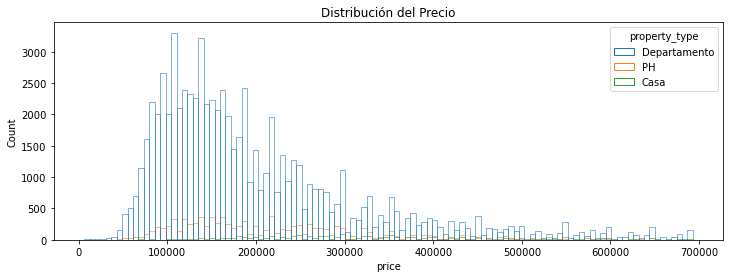

In [23]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='price', hue='property_type', fill=False)
plt.title('Distribución del Precio')

*Se puede observar que ahora la gráfica de distribución es mucho más legible, aunque no es del tipo “normal” (todavía presenta una cola hacia la derecha), conseguimos ajustar bastante esta variable sin perder una cantidad considerables de registros.*

Vamos a comenzar analizando valores nulos en la variable `bathrooms`, graficando: 
* como se trisbrubuyen los nulos según los diferentes Barrios. 
* que Tipos de Propiedades presentan más valores nulos. 


In [24]:
print('Valores Nulos: ')
print(df.isnull().sum())

Valores Nulos: 
lat                3928
lon                3942
l3                    0
rooms                 0
bedrooms              0
bathrooms          2131
surface_total      8668
surface_covered    8970
price                 0
property_type         0
dtype: int64


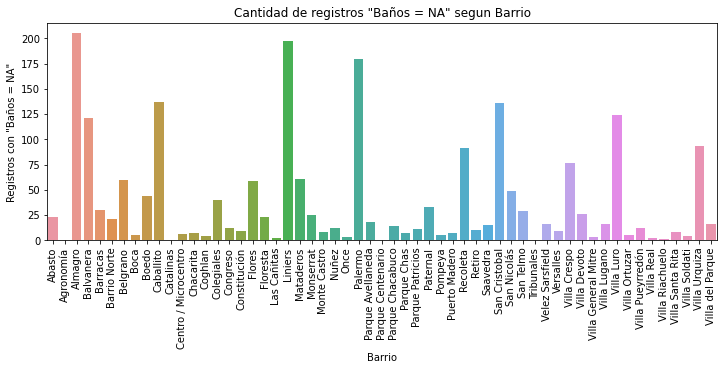

In [25]:
banios = df.bathrooms.isnull().groupby([df['l3']]).sum().astype(int).reset_index(name='count')

plt.figure(figsize=(12,4))
sns.barplot(data=banios, x='l3', y='count')
plt.xlabel('Barrio')
plt.ylabel('Registros con "Baños = NA"')
plt.title('Cantidad de registros "Baños = NA" segun Barrio')
plt.xticks(rotation=90)
plt.show()

In [26]:
print('Cantidad de "Baños = NA" segun Tipo de Propiedad:')
print('\n')
df.bathrooms.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='Baños NA')

Cantidad de "Baños = NA" segun Tipo de Propiedad:




,property_type,Baños NA
0,Casa,135
1,Departamento,1908
2,PH,88


Los valores nulos para `bathrooms` están bastantes distribuidos para los diferentes Barrios, y vemos que en las propiedades tipo Departamento es donde más faltan. 
Una buena manera de realizar una imputación sería considerar a todos estos valores faltantes igual a 1. Es decir, suena lógico pensar que cualquiera sea el tipo de propiedad va a tener al menos un baño. 

Sin embargo, vamos a utilizar como criterio para imputar la Moda de esta variable `bathrooms` según los tres tipos de propiedades. Tendremos entonces: 


In [27]:
mode = lambda x: x.mode()
b_moda = df.groupby('property_type')['bathrooms'].agg(mode)
#print(b.size)
#print(type(b))
print('La Mode de "bathrooms" segun el Tipo de Propiedad:')
print('\n')
print(b_moda)

La Mode de "bathrooms" segun el Tipo de Propiedad:


property_type
Casa            2.0
Departamento    1.0
PH              1.0
Name: bathrooms, dtype: float64


Antes de realizar la imputación, vamos a crear un nuevo atributo para marcar en nuestro dataset en cuáles registros la variable `bathrooms` era un dato faltante.

In [28]:
df['bathrooms_na'] = np.where(df['bathrooms'].isnull(), 1, 0)

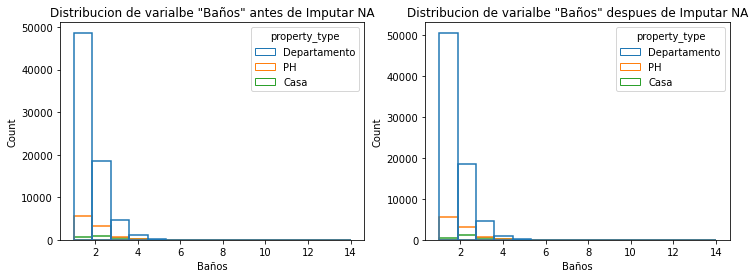

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='bathrooms', hue='property_type', bins=15, fill=False)
plt.xlabel('Baños')
plt.title('Distribucion de varialbe "Baños" antes de Imputar NA')


df['bathrooms'] = df.groupby('property_type')['bathrooms'].apply(lambda x: x.fillna(x.mode().iloc[0]))


plt.subplot(1,2,2)
sns.histplot(data=df, x='bathrooms', hue='property_type', bins=15, fill=False)
plt.xlabel('Baños')
plt.title('Distribucion de varialbe "Baños" despues de Imputar NA')

plt.show()

*Como se puede observar en el gráfico anterior, la imputación realizada no representa un cambio drástico en la distribución de la variable.*

Avancemos ahora analizando las variables de superficie `surface_total` y `surface_covered`. 

In [30]:
print('Valores Nulos: ')
print(df.isnull().sum())

Valores Nulos: 
lat                3928
lon                3942
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total      8668
surface_covered    8970
price                 0
property_type         0
bathrooms_na          0
dtype: int64


In [31]:
print('Datos estadísticos: ')
print(df.describe())

Datos estadísticos: 
                lat           lon         rooms      bedrooms     bathrooms  \
count  82981.000000  82967.000000  86909.000000  86909.000000  86909.000000   
mean     -34.599684    -58.437272      2.865399      1.890587      1.456190   
std        0.023965      0.035842      1.218866      1.028893      0.729331   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.614539    -58.460516      2.000000      1.000000      1.000000   
50%      -34.600261    -58.434622      3.000000      2.000000      1.000000   
75%      -34.585460    -58.412097      4.000000      3.000000      2.000000   
max      -34.535818    -58.353930     21.000000     15.000000     14.000000   

       surface_total  surface_covered          price  bathrooms_na  
count   78241.000000     77939.000000   86909.000000  86909.000000  
mean      103.717054        86.828456  205991.833757      0.024520  
std      1004.825644       797.082290  122053.237356      0.

Son variables que presentan al menos 2 inconvenientes, por un lado una gran cantidad de valores nulos, y por el otro tienen una alta dispersión de valores. Si decidiéramos primero tratar de ajustar los valores extremos, sin completar los nulos, vamos a descartar una gran cantidad de registros. Por el contrario, si aplicamos un tratamiento de valores nulos, no debemos utilizar algún criterio estadístico que se vea afectado por valores extremos (como considerar la Media por ejemplo). 

Veamos que podemos encontrar en el dataset para estas variables.

In [32]:
print('Cantidad de "surface_total" nulos, siendo "surface_covered" tambien nulo ')
print(df.surface_covered.isnull().groupby([df['surface_total'].isnull()]).sum().astype(int).reset_index(name='count'))

print('\n')

print('Cantidad de "surface_covered" nulo, siendo "surface_total" tambien nulo')
print(df.surface_total.isnull().groupby([df['surface_covered'].isnull()]).sum().astype(int).reset_index(name='count'))


Cantidad de "surface_total" nulos, siendo "surface_covered" tambien nulo 
   surface_total  count
0          False    498
1           True   8472


Cantidad de "surface_covered" nulo, siendo "surface_total" tambien nulo
   surface_covered  count
0            False    196
1             True   8472


In [33]:
print('Cantidad de registros nulos en “surface_total” segun tipo de propiedad:')
print('\n')
print(df.surface_total.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='Nulos en Sup Tot'))
print('\n')
print('Cantidad de registros nulos en “surface_covered” segun tipo de propiedad:')
print('\n')
print(df.surface_covered.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='Nulos en Sup Cub'))

Cantidad de registros nulos en “surface_total” segun tipo de propiedad:


  property_type  Nulos en Sup Tot
0          Casa               405
1  Departamento              8223
2            PH                40


Cantidad de registros nulos en “surface_covered” segun tipo de propiedad:


  property_type  Nulos en Sup Cub
0          Casa               414
1  Departamento              8485
2            PH                71


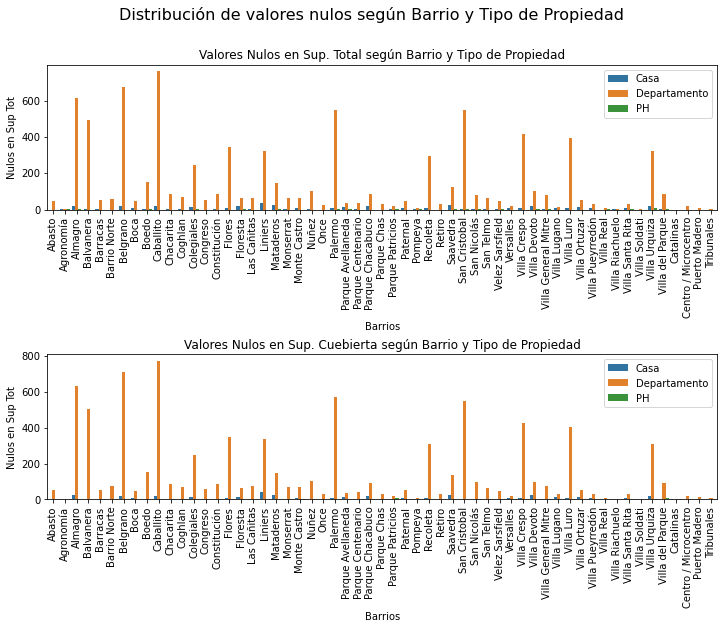

In [34]:
surface_t = df.surface_total.isnull().groupby([df['property_type'], df['l3']]).sum().astype(int).reset_index(name='NA Sup Tot')

surface_c = df.surface_covered.isnull().groupby([df['property_type'], df['l3']]).sum().astype(int).reset_index(name='NA Sup Cove')

plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace = 1)
plt.suptitle('Distribución de valores nulos según Barrio y Tipo de Propiedad', fontsize=16)

plt.subplot(2,1,1)

sns.barplot(data=surface_t, x='l3', y='NA Sup Tot', hue='property_type')
plt.xticks(rotation=90)
plt.title('Valores Nulos en Sup. Total según Barrio y Tipo de Propiedad')
plt.xlabel('Barrios')
plt.ylabel('Nulos en Sup Tot')
plt.legend(loc=1)

plt.subplot(2,1,2)

sns.barplot(data=surface_c, x='l3', y='NA Sup Cove', hue='property_type')
plt.xticks(rotation=90)
plt.title('Valores Nulos en Sup. Cuebierta según Barrio y Tipo de Propiedad')
plt.xlabel('Barrios')
plt.ylabel('Nulos en Sup Tot')
plt.legend(loc=1)

plt.show()

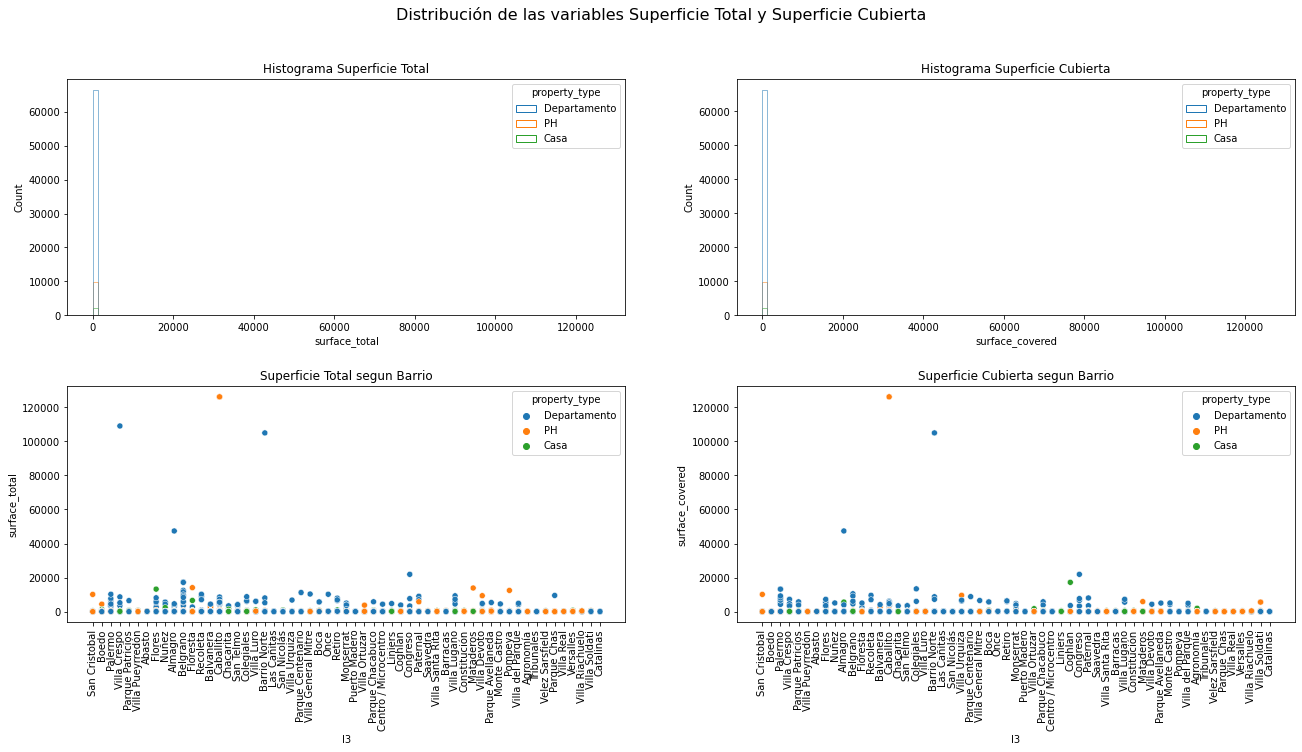

In [35]:
plt.figure(figsize=(22,10))
plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Distribución de las variables Superficie Total y Superficie Cubierta', fontsize=16)

plt.subplot(2,2,1)
sns.histplot(data=df, x='surface_total', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma Superficie Total')

plt.subplot(2,2,2)
sns.histplot(data=df, x='surface_covered', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma Superficie Cubierta')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='l3', y='surface_total', hue='property_type')
plt.xticks(rotation=90)
plt.title('Superficie Total segun Barrio')


plt.subplot(2,2,4)
sns.scatterplot(data=df, x='l3', y='surface_covered', hue='property_type')
plt.xticks(rotation=90)
plt.title('Superficie Cubierta segun Barrio')

plt.show()

*De los gráficos podemos evidenciar:* 
* *hay una gran cantidad de registros donde tenemos ambas variables al mismo tiempo con valor nulo.* 
* *las propiedades tipo Departamentos son las que más registros nulos tienen para estas variables.* 
* *ambas variables presentan una distribución de valores muy alta, donde se evidencia algunos pocos Barrios con algunos pocos registros con valores muy altos.* 

Vamos a realizar primero una imputación de valores nulos, para luego ajustar los valores extremos. 

Para imputar vamos a utilizar la Moda de ambas variables `surface_total` y `surface_covered` según el Tipo de Propiedad y el Barrio en donde se encuentren. De esta manera nos aseguramos que los valores extremos no interfieran en la imputación.    
Además, vamos a crear dos nuevos atributos para marcar en nuestro dataset en cuáles registros la variables de superficies cuentan con valores faltantes.


In [36]:
mode = lambda x: statistics.mode(x)

sup_t_moda = df.surface_total.groupby([df['property_type'], df['l3']]).agg(mode).reset_index(name='moda')
sup_c_moda = df.surface_covered.groupby([df['property_type'], df['l3']]).agg(mode).reset_index(name='moda')

print(sup_t_moda.head())
print('\n')
print(sup_c_moda.head())


df['sup_total_na'] = np.where(df['surface_total'].isnull(), 1, 0)
df['sup_cove_na'] = np.where(df['surface_covered'].isnull(), 1, 0)

  property_type         l3   moda
0          Casa     Abasto  216.0
1          Casa  Agronomía  244.0
2          Casa    Almagro  188.0
3          Casa  Balvanera  120.0
4          Casa   Barracas  266.0


  property_type         l3   moda
0          Casa     Abasto  118.0
1          Casa  Agronomía  244.0
2          Casa    Almagro  178.0
3          Casa  Balvanera  110.0
4          Casa   Barracas  180.0


In [37]:
for i in df.index:
    if(np.isnan(df.surface_total.loc[i])):
        df.surface_total.loc[i] = float(sup_t_moda.loc[:,'moda'][sup_t_moda.property_type == df.loc[i].property_type][sup_t_moda.l3 == df.loc[i].l3])
    if(np.isnan(df.surface_covered.loc[i])):
        df.surface_covered.loc[i] = float(sup_c_moda.loc[:,'moda'][sup_c_moda.property_type == df.loc[i].property_type][sup_c_moda.l3 == df.loc[i].l3])

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Con los valores ya imputados, vamos a descartar aquellos registros donde la Superficie Cubierta sea mayor que la Superficie Total.

In [38]:
df = df[(df.surface_total >= df.surface_covered)].reset_index(drop=True)

Para corregir los valores extremos en ambas variables `surface_total` y `surface_covered` se va a aplicar como estrategia un análisis de percentiles, ya que de esta forma ajustamos la dispersión de valores sin perder tanta información. 

In [39]:
print('Analisis Sup. Total: ')
p99_t = np.nanpercentile(df.surface_total, 99.5)
print('Valor percentil 99.5 = ',p99_t)
print('Cantidad registros que no cumplen: ', df.surface_total[df.surface_total >= p99_t].count())

Analisis Sup. Total: 
Valor percentil 99.5 =  430.0
Cantidad registros que no cumplen:  442


In [40]:
mask = (df.surface_total < p99_t)
df = df[mask]

In [41]:
print('Analisis Sup. Cubierta: ')
p99_c = np.nanpercentile(df.surface_covered, 99.5)
print('Valor percentil 99.5 = ',p99_c)
print('Cantidad registros que no cumplen: ', df.surface_total[df.surface_total >= p99_c].count())

Analisis Sup. Cubierta: 
Valor percentil 99.5 =  265.0
Cantidad registros que no cumplen:  1436


In [42]:
mask = (df.surface_total < p99_c)
df = df[mask]

Veamos ahora cuál es el aspecto de las distribuciones de estas variables, luego de realizarle su tratamiento.

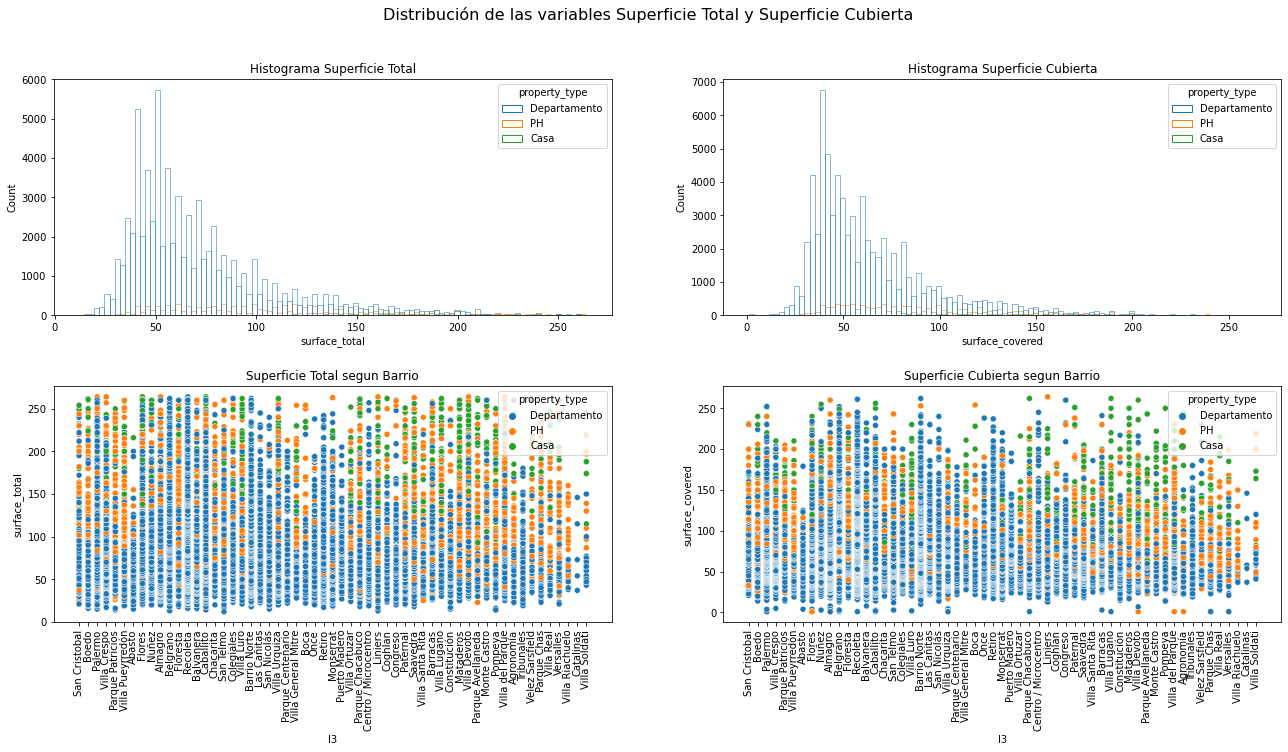

In [43]:
plt.figure(figsize=(22,10))
plt.subplots_adjust(hspace = 0.3)
plt.suptitle('Distribución de las variables Superficie Total y Superficie Cubierta', fontsize=16)

plt.subplot(2,2,1)
sns.histplot(data=df, x='surface_total', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma Superficie Total')

plt.subplot(2,2,2)
sns.histplot(data=df, x='surface_covered', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma Superficie Cubierta')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='l3', y='surface_total', hue='property_type')
plt.xticks(rotation=90)
plt.title('Superficie Total segun Barrio')


plt.subplot(2,2,4)
sns.scatterplot(data=df, x='l3', y='surface_covered', hue='property_type')
plt.xticks(rotation=90)
plt.title('Superficie Cubierta segun Barrio')

plt.show()

*Podemos evidenciar que ahora la gráfica de distribuciones es mucho más legible para nuestras variables. Es para destacar que, aunque no es del todo una gráfica  tipo “normal” (todavía presenta una cola hacia la derecha), conseguimos quitar esos valores extremos sin perder demasiados registros.*

Finalmente, veamos cómo podemos imputar los valores faltantes en las variables `lat` y `lon`.

In [44]:
print('Valores Nulos: ')
print(df.isnull().sum())

Valores Nulos: 
lat                3800
lon                3812
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
property_type         0
bathrooms_na          0
sup_total_na          0
sup_cove_na           0
dtype: int64


In [45]:
print('Cantidad de "lon" nulos, siendo "lat" tambien nulo ')
print(df.lat.isnull().groupby([df['lon'].isnull()]).sum().astype(int).reset_index(name='count'))

print('\n')

print('Cantidad de "lat" nulos, siendo "lon" tambien nulo ')
print(df.lon.isnull().groupby([df['lat'].isnull()]).sum().astype(int).reset_index(name='count'))


Cantidad de "lon" nulos, siendo "lat" tambien nulo 
     lon  count
0  False      0
1   True   3800


Cantidad de "lat" nulos, siendo "lon" tambien nulo 
     lat  count
0  False     12
1   True   3800


In [46]:
print('Cantidad de registros nulos en “lat” segun tipo de propiedad:')
print(df.lat.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='Nulos en Lat'))

print('\n')

print('Cantidad de registros nulos en “lon” segun tipo de propiedad:')
print(print(df.lon.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='Nulos en Lon')))

Cantidad de registros nulos en “lat” segun tipo de propiedad:
  property_type  Nulos en Lat
0          Casa            24
1  Departamento          3583
2            PH           193


Cantidad de registros nulos en “lon” segun tipo de propiedad:
  property_type  Nulos en Lon
0          Casa            26
1  Departamento          3592
2            PH           194
None


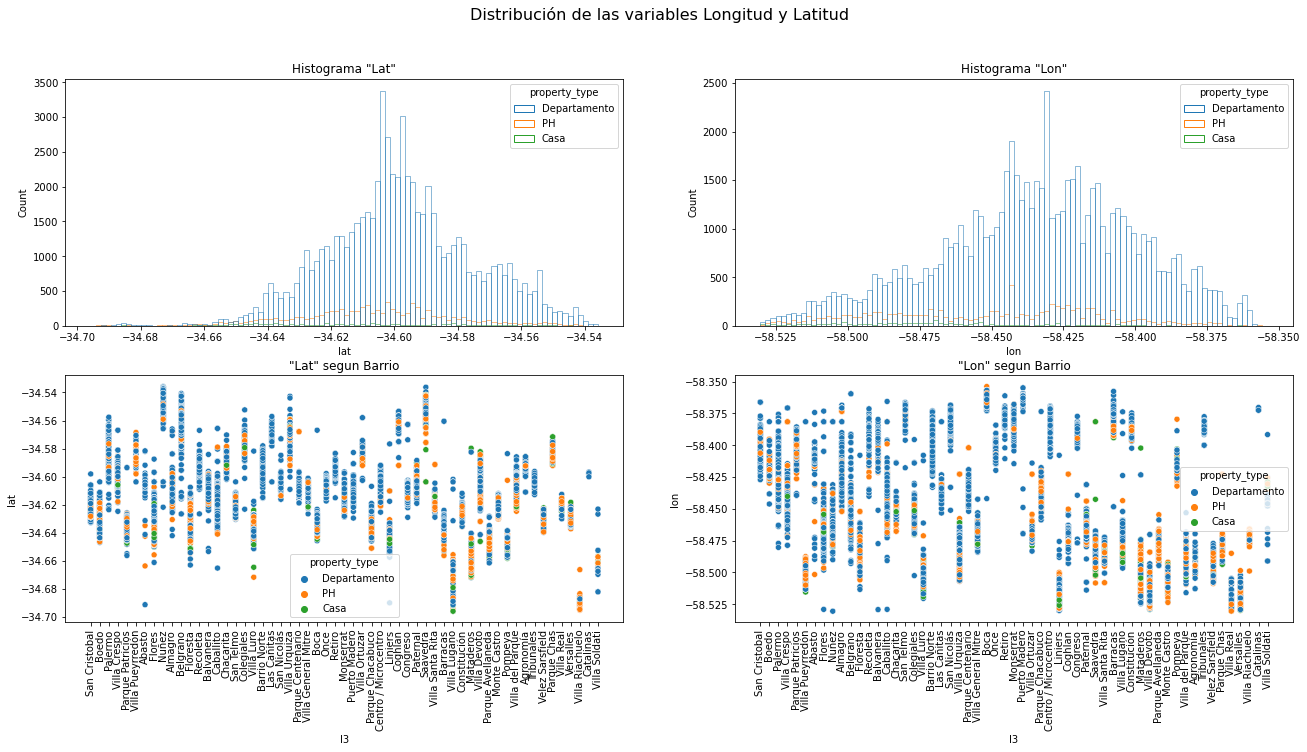

In [47]:
plt.figure(figsize=(22,10))
plt.suptitle('Distribución de las variables Longitud y Latitud', fontsize=16)

plt.subplot(2,2,1)
sns.histplot(data=df, x='lat', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma "Lat"')

plt.subplot(2,2,2)
sns.histplot(data=df, x='lon', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma "Lon"')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='l3', y='lat', hue='property_type')
plt.xticks(rotation=90)
plt.title('"Lat" segun Barrio')


plt.subplot(2,2,4)
sns.scatterplot(data=df, x='l3', y='lon', hue='property_type')
plt.xticks(rotation=90)
plt.title('"Lon" segun Barrio')


plt.show()

*Observando la información obtenida, podemos ver:* 
* *siempre que tenemos un valor faltante en una de las variables, también es faltante el valor en la otra.* 
* *las propiedades tipo Departamento son las que más registros nulos tienen para estas variables.* 
* *las gráficas de histograma no están tan mal, para ambas variables se puede observar una cola de valores hacia la izquierda.* 


Entonces, nos encontramos con valores nulos para las dos variables al mismo tiempo en la gran mayoria de los registros. Además, estas variables nos están definiendo una posición de la propiedad en el mapa. 
Podemos considerar realizar una imputación por la Media de estas variables, según Tipo de Propiedad, sin embargo por la naturaleza de las variables no podemos analizar si hay algún valor atípico que nos pueda afectar el valor de la Media. 

Es por esto que vamos a realizar una imputación por la Moda de esas variables según el Tipo de Propiedad y el Barrio. 
También, vamos a crear dos nuevos atributos para marcar en nuestro dataset en cuáles registros estas variables cuanta con valores faltantes.


In [48]:
mode = lambda x: statistics.mode(x)

m_lat = df.groupby('l3')['lat'].agg(mode).reset_index(name='m_lat')
m_lon = df.groupby('l3')['lon'].agg(mode).reset_index(name='m_lon')

m_lat_lon = pd.merge(m_lat, m_lon)

df['lat_na'] = np.where(df['lat'].isnull(), 1, 0)
df['lon_na'] = np.where(df['lon'].isnull(), 1, 0)

In [49]:
for i in m_lat_lon.l3:
    df.loc[:,'lat'][df.l3 == i] = np.where(pd.isnull(df.loc[:,'lat'][df.l3 == i]), m_lat_lon['m_lat'].loc[(m_lat_lon.l3 == i),], df.loc[:,'lat'][df.l3 == i])
    df.loc[:,'lon'][df.l3 == i] = np.where(pd.isnull(df.loc[:,'lon'][df.l3 == i]), m_lat_lon['m_lon'].loc[(m_lat_lon.l3 == i),], df.loc[:,'lon'][df.l3 == i])


<ipython-input-49-a4e7dced1dd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'lon'][df.l3 == i] = np.where(pd.isnull(df.loc[:,'lon'][df.l3 == i]), m_lat_lon['m_lon'].loc[(m_lat_lon.l3 == i),], df.loc[:,'lon'][df.l3 == i])
<ipython-input-49-a4e7dced1dd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'lat'][df.l3 == i] = np.where(pd.isnull(df.loc[:,'lat'][df.l3 == i]), m_lat_lon['m_lat'].loc[(m_lat_lon.l3 == i),], df.loc[:,'lat'][df.l3 == i])


Veamos ahora cuál es el aspecto de las distribuciones de estas variables, luego de realizarle su tratamiento.

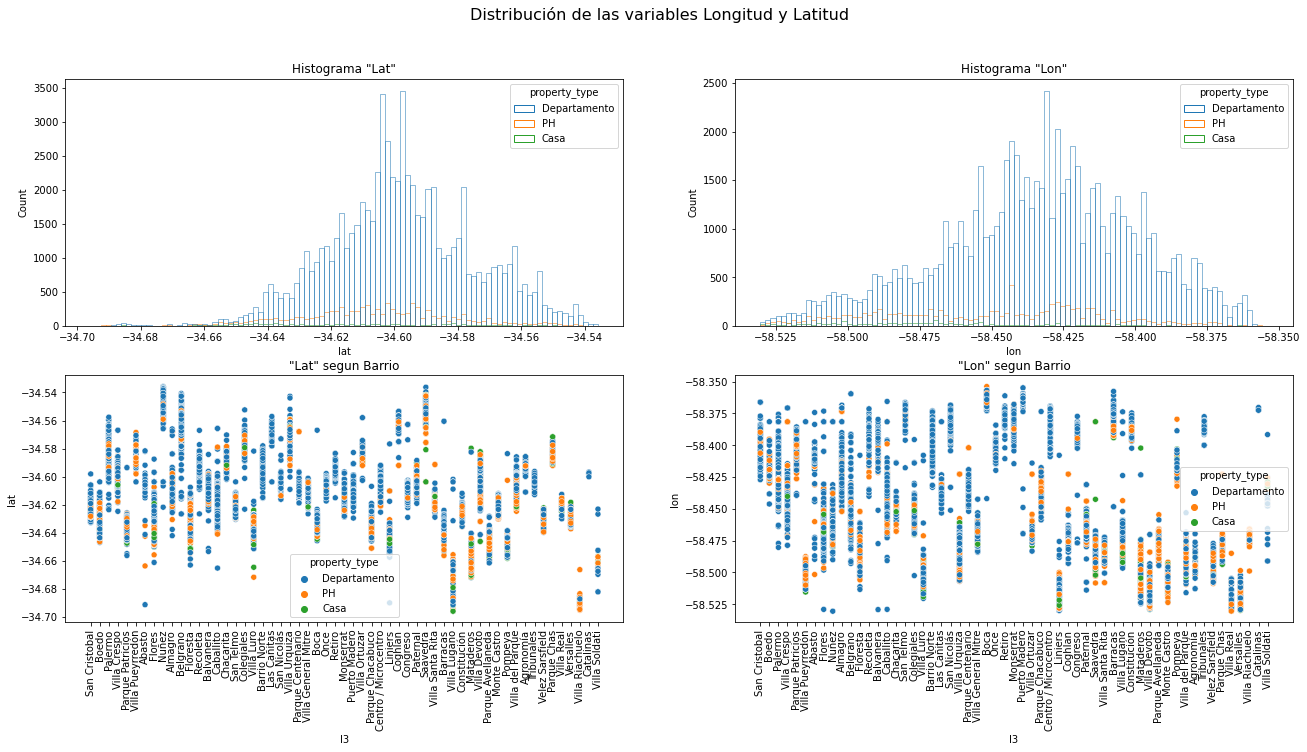

In [50]:
plt.figure(figsize=(22,10))
plt.suptitle('Distribución de las variables Longitud y Latitud', fontsize=16)

plt.subplot(2,2,1)
sns.histplot(data=df, x='lat', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma "Lat"')

plt.subplot(2,2,2)
sns.histplot(data=df, x='lon', hue='property_type', bins=100, fill=False)
#plt.xlabel('Banios')
plt.title('Histograma "Lon"')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='l3', y='lat', hue='property_type')
plt.xticks(rotation=90)
plt.title('"Lat" segun Barrio')


plt.subplot(2,2,4)
sns.scatterplot(data=df, x='l3', y='lon', hue='property_type')
plt.xticks(rotation=90)
plt.title('"Lon" segun Barrio')


plt.show()

*Podemos evidenciar que las gráficas de distribuciones no difieren mucho de la original, eso nos da la pauta que con la imputación realizada no estamos cambiando significativamente el propiedades estadísticas de las variables originales.*

De esta manera terminamos ajustando los valores de nuestro dataset, para fianlemente quedarnos con:

In [51]:
print('El tamaño del dataset ajustado es: ', df.shape)

El tamaño del dataset ajustado es:  (83203, 15)


In [52]:
print('Veamos valores nulos y datos estadísticos del dataset:')
print('\n')
print('Valores Nulos: ')
print(df.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(df.describe(include=np.object))
print(df.describe())


Veamos valores nulos y datos estadísticos del dataset:


Valores Nulos: 
lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
bathrooms_na       0
sup_total_na       0
sup_cove_na        0
lat_na             0
lon_na             0
dtype: int64


Datos estadísticos: 
             l3 property_type
count     83203         83203
unique       57             3
top     Palermo  Departamento
freq      11569         72881
                lat           lon         rooms      bedrooms     bathrooms  \
count  83203.000000  83203.000000  83203.000000  83203.000000  83203.000000   
mean     -34.598989    -58.436641      2.813132      1.848972      1.434263   
std        0.023697      0.035419      1.134267      0.964641      0.699830   
min      -34.695790    -58.530467      1.000000      0.000000      1.000000   
25%      -34.613689    -58.4594

In [176]:

#df.to_csv('clean_dataset.csv', index=False)


In [180]:
#df_o = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/clean_dataset.csv')

#df = df_o.copy()
#print(df.shape)

### Iteración 2 

Volvamos a hacer una nueva iteración con el mejor modelo obtenido en el Proyecto 1, y el RandomForest que utilizamos anteriormente, y veamos cual es el impacto al utilizar nuestro dataset ajustado. 


In [53]:
X = df.drop(columns=['price'])
print(X.shape)

y = df.price
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X.property_type, random_state=1)

(83203, 14)
(83203,)


In [54]:
num_t = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_t = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

A continuación aplicamos un pequeño ajuste al momento de aplicar las transformaciones, donde especificamos en particular a cuales columnas del dataset se les debe aplicar ciertas transformaciones, sin afectar el resto de atributos. 
Este ajuste es necesario, puesto que ahora tenemos variables binarias que nos hacen referencia a los valores faltantes de los atributos originales.


In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_t, ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']),
        ('cat', cat_t, ['l3', 'property_type'])],
        remainder='passthrough')

In [56]:
################################################################################################
#                                DecisionTree Proyecto 1                                       #
################################################################################################

dt_op = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', DecisionTreeRegressor(max_depth=17, random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3', 'property_type'])])),
                ('reg', DecisionTreeRegressor(max_dept

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


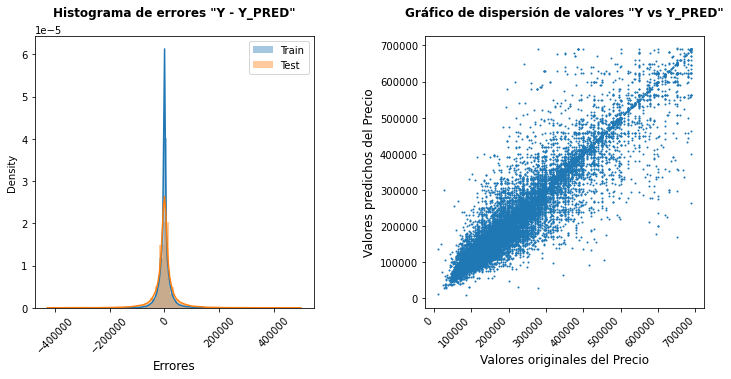

In [57]:
evaluacion_modelo(X_train, X_test, y_train, y_test, dt_op)

In [58]:
################################################################################################
#                                   RamdomForest                                               #
################################################################################################

rf_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', RandomForestRegressor(random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['l3', 'property_type'])])),
                ('reg', RandomForestRegressor(random_s

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


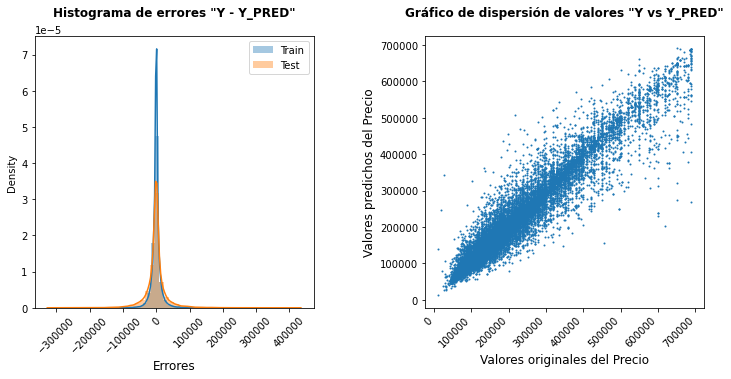

In [59]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_r)

*Como se puede observar al trabajar con nuestro dataset ajustado, el rendimiento de ambos modelos mejora considerablemente. Es muy destacable la mejora obtenida.* 

*Para el mejor modelo obtenido en el Proyecto 1, pasamo de valores:*  
* *R2 = 76.6% y RMSE = 146000 aprox*  
a valores:  
* *R2 = 86.1% y RMSE = 43000 aprox*  

*Para el modelo de RamdomForest, en la primera Iteración obtuvimos:* 
* *R2 = 91.1% y RMSE = 91000 aprox*  
a valores:  
* *R2 = 92.2% y RMSE = 32000 aprox*  

*Seguimos observando que el modelo RamdomForest hace un mejor trabajo que el Árbol de decisión, ya que se trate de un modelo más robusto.*


---

<br />

## Parte B: Modelos Avanzados 
<br />

---


En este apartado la idea es probar tres modelos diferentes, y luego intentar optimizar sus hiperparametros para encontrar cual de estos modelos propuestos hace un mejor trabajo.

### Iteración 3 

Los modelos elegidos para probar son:
* RamdomForest: modelo muy robusto de tipo Bagging. 
* XGBoost: modelo muy robusto de tipo Boosting. 
* Support-Vector Machine: hasta hace algún tiempo era considerado "el modelo" más superiores. 

En esta iteración 3 pretendemos modelar con los hiperparámetros por defecto de ambos modelos, y conocer inicialmente su desempeño.


**Aviso:** apartir de este punto se decide quitar la variable `l3`, que hace referencia al Barrio, para modelar, ya que es una variable categórica que tienen que ser transformada, provocando que el dataset sea más extenso, e impactando directamente en los tiempos de modelados.  
Si bien es una variable importante, ya que el Barrio influye mucho en el precio de las propiedades, de alguna manera esta información está codificada según las variables `lat` y `lon`.


In [60]:
X = df.drop(columns=['price', 'l3'])
print(X.shape)

y = df.price
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X.property_type, random_state=1)

(83203, 13)
(83203,)


In [61]:
num_t = Pipeline(steps=[
    ('scaler', StandardScaler())])

cat_t = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_t, ['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']),
        ('cat', cat_t, ['property_type'])],
        remainder='passthrough')

In [63]:
################################################################################################
#                                   RamdomForest                                               #
################################################################################################

rf_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', RandomForestRegressor(random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type'])])),
                ('reg', RandomForestRegressor(random_state=1

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


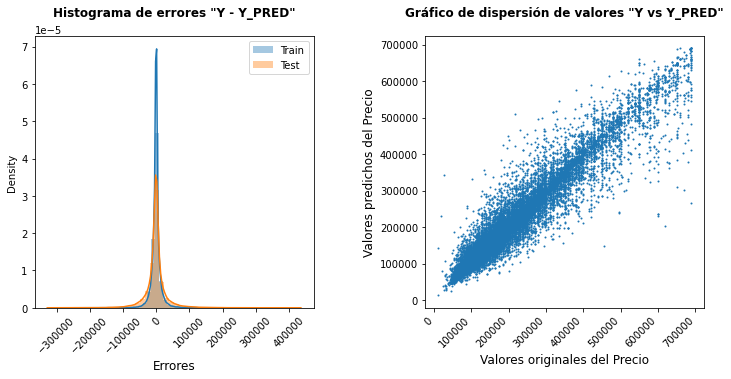

In [64]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_r)

In [65]:
################################################################################################
#                                        XGBoost                                               #
################################################################################################

xgb_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', xg.XGBRegressor(random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type'])])),
                ('reg',
                 XGBRegressor(base_s

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


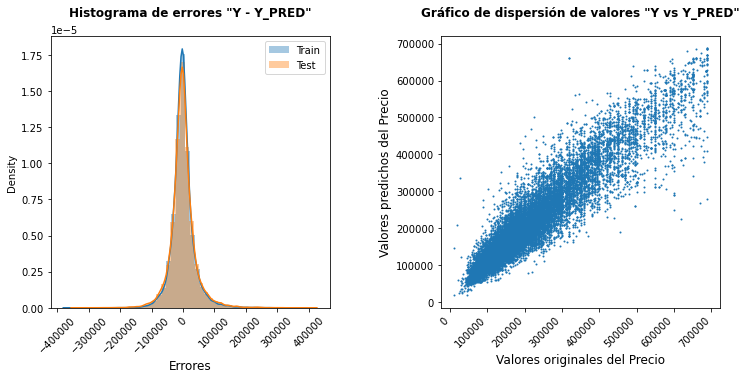

In [66]:
evaluacion_modelo(X_train, X_test, y_train, y_test, xgb_r)

In [67]:
################################################################################################
#                                          SVR                                                #
################################################################################################

svm_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', SVR())])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type'])])),
                ('reg', SVR())])


Raíz del error cuadrático

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


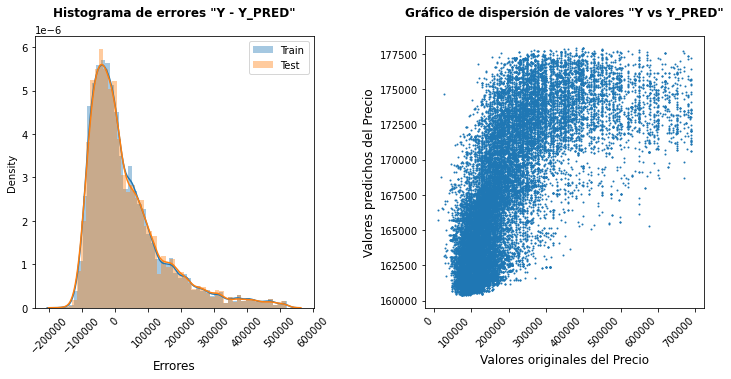

In [68]:
evaluacion_modelo(X_train, X_test, y_train, y_test, svm_r)

*Como conclusión podemos ordenar los modelos según su desempeño como:*
* *RamdomFores: R2 = 92.1%, RMSE = 33000 aprox*
* *XGBoost: R2 = 88.3%, RMSE = 40000 aprox. Este modelo presenta un buen rendimiento, pero es destacable la velocidad para el modelado.*
* *SVM: R2 = -0.02 %, RMSE = 119555 aprox. Presente un desempeño muy malo, con valores de errores malos, con tiempos de ejecución muy altos. No es un buen estimador para este problema.*



### Optimización de hiperparametros  

Vamos a utilizar el método de GridSearch para realizar la búsqueda de los mejores hiperparametros, considerando como métrica el valor de R2.  
Por una cuestión de costo computacional y tiempos, se van a probar 3 hiperparametros diferentes para cada modelo, con 2 o 3 valores distintos para cada hiperparametro.  


Para RamdomForest se va a utilizar para optimizar los siguientes hiperparametros: 

* n_estimators: define la cantidad de árboles a implementar en el modelo. En este tipo de modelos buscamos que cada modelo individualmente trabaje en la zona de alta varianza (ouverfiting), para luego encontrar el valor predicho mediante una votación de todos los resultados obtenidos por cada modelo indivudual. Entonces, mientras mayor cantidad de árboles implementemos, estaríamos teniendo más resultados que participen de la votación, y ayudamos a reducir la varianza general del modelo.  
Es por esto que se tomaron los valores de 100,150 y 200.

* max_feature: a la hora de aplicar cada árbol de manera individual se toma una muestra de algunos atributos, y se los utiliza para predecir. Con este hiperparametro estamos definiendo el criterio a considerar para tomar esa cantidad de atributos en cada árbol.  Para nuestro caso *auto* (considera todos los atributos del dataset), y *sqrt* (se considera una cantidad de atributos igual a la raíz cuadrada del número de atributos).  

* bootstrap: este parámetro nos define si al momento de elegir la muestra se tiene en cuenta todo el dataset, o solo las que no fueron elegidas previamente.


In [69]:
################################################################################################
#                               Optimizacion - RamdomForest                                    #
################################################################################################

param_grid = {
    'reg__n_estimators': [100, 150, 200],
    'reg__max_features': ['auto', 'sqrt'],
    'reg__bootstrap': [True, False]
}

In [70]:
grid_search = GridSearchCV(estimator=rf_r, param_grid=param_grid, cv=5, scoring='r2')

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['lat',
                                                                          'lon',
                                                                          'rooms',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'surface_total',
                                          

In [72]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_fit_time', 'mean_score_time',
            'param_reg__n_estimators',
            'param_reg__max_features',
            'param_reg__bootstrap',
            ]].head(5)


,mean_test_score,std_test_score,mean_fit_time,mean_score_time,param_reg__n_estimators,param_reg__max_features,param_reg__bootstrap
11,0.911825,0.003409,16.966708,0.842278,200,sqrt,False
10,0.911746,0.003300,12.669929,0.639614,150,sqrt,False
9,0.911574,0.003206,8.458288,0.425789,100,sqrt,False
5,0.909358,0.002993,11.479301,0.756475,200,sqrt,True
2,0.909270,0.003366,37.161634,0.780307,200,auto,True


Para XGBoost se va a utilizar para optimizar los siguientes hiperparametros:  

* eta: para este modelo, luego de realizar la predicción, aquellas muestras que no fueron correctamente predichas se les asigna un peso, para que el próximo modelo tenga en cuenta estas muestras como más importantes para ajustar. Esta hiperparametro interviene en la definición de ese peso, el cual puede tener un valor entre 0 y 1, por eso se eligió tomar tres valores (0.1, 0.3 y 0.7) para barrer este rango.  

* max_depth: especifica la profundidad de cada árbol. Para este tipo de modelo tipo Boosting, se pretende que cada árbol de manera individual trabaje en un zona de  alto sesgo (underfing), por lo tanto este valor no debería ser alto. Se decidió probar con tres valores: 1, 3 y 6.  

* tree_method: especifica el algoritmo utilizado para construir los árboles que utiliza el modelo.  
Se prueban tres valores diferentes “exact” (método más preciso, pero más lento computacionalmente), “approx” e “ hist” (métodos recomendados para dataset extensos, y más rápidos)

In [73]:
################################################################################################
#                                  Optimizacion - XGBoost                                      #
################################################################################################

param_grid = {
    'reg__eta': [0.1, 0.3, 0.7],
    'reg__max_depth': [1, 3, 6],
    'reg__tree_method': ['exact', 'approx', 'hist']
}

In [74]:
grid_search = GridSearchCV(estimator=xgb_r, param_grid=param_grid, cv=5, scoring='r2')

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['lat',
                                                                          'lon',
                                                                          'rooms',
                                                                          'bedrooms',
                                                                          'bathrooms',
                                                                          'surface_total',
                                          

In [76]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['mean_test_score', 'std_test_score', 'mean_fit_time', 'mean_score_time',
            'param_reg__eta',
            'param_reg__max_depth',
            'param_reg__tree_method',
            ]].head(5)

,mean_test_score,std_test_score,mean_fit_time,mean_score_time,param_reg__eta,param_reg__max_depth,param_reg__tree_method
24,0.878323,0.001885,3.001631,0.041788,0.7,6,exact
6,0.878323,0.001885,2.965008,0.038563,0.1,6,exact
15,0.878323,0.001885,3.087699,0.039588,0.3,6,exact
26,0.877958,0.001905,0.687368,0.038272,0.7,6,hist
8,0.877958,0.001905,0.695969,0.038574,0.1,6,hist


**Nota:** las siguientes 4 celdas corresponden a la optimización de hiperparametros para Support-Vector Machine, sin embargo de todas las pruebas realizadas, nunca se consiguió que termine la ejecución del GridSearch. Se probó dejando correr el modelo por muchas horas, pero nunca finalizó su ejecución.  
Por este motivo, se decide dejar fuera del análisis de optimización al modelo Support-Vector Machine.


In [ ]:
################################################################################################
#                                    Optimizacion - SVR                                        #
################################################################################################

#param_grid = {
#    'reg__kernel': ['linear', 'sigmoid'],
#    'reg__gamma': ['scale', 'auto'],
#    'reg__C': [1, 6]
#}

In [ ]:
#grid_search = GridSearchCV(estimator=svm_r, param_grid=param_grid, cv=5, scoring='r2')

In [ ]:
#grid_search.fit(X_train, y_train)

In [ ]:
#cv_results = pd.DataFrame(grid_search.cv_results_)
#cv_results = cv_results.sort_values("mean_test_score", ascending=False)
#cv_results[['mean_test_score', 'std_test_score', 'mean_fit_time', 'mean_score_time',
#            'param_reg__kernel',
#            'param_reg__gamma',
#            'param_reg__C',
#            ]].head(5)

*Podemos concluir que el modelo de RamdomForest es el que mejor desempeño presenta, con una valor de R2 promedio alrededor de 91%.*  
*Sin embargo, el modelo XGBoost también hace un muy buen trabajo, con un valor de R2 promedio del 87%, pero es para destacar que en cuanto a la velocidad de ejecución es muy superior.*  

*Entonces:*  
* *RamdomForest y XGBoost presentar muy buen desempeño general.* 
* *XGBoost es muy superior en tiempos de ejecución contra RamdomForest.* 
* *dependiendo del problema y la necesidad, si es necesario alta velocidad de procesamiento, es más conveniente elegir XGBoost.* 
* *para nuestro caso, tomamos al mejor modelo **RamdomForest** con los hiperparametros: **n_estimators = 200**, **max_feature = sqrt**, **bootstrap = False**.*



---

<br />

## Parte C: Interpretación de modelos y resultados obtenidos 
<br />

---

### Importancia de Atributos

Tomemos el mejor modelo elegido, y respondamos primero algunas preguntas:
* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? (Para responder esta pregunta, vamos a hacer uso de una funcion que nos ayuda a obtener el nombre de los atributos que utiliza el modelo para sus predicciones, esta funcion sera **get_feature_names**)
* Si tomamos algunos árboles al azar del RamdomForest, en qué se diferencian esos árboles? 
* ¿Coincide con lo que se esperaba  a partir de trabajar con este dataset?


In [77]:
################################################################################################
#                                 RamdomForest - Best                                          #
################################################################################################


rf_best = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap=False, random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type'])])),
                ('reg',
                 RandomForestRegress

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


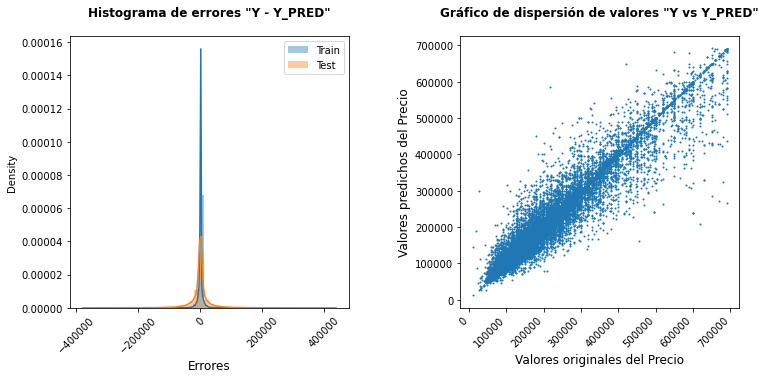

In [78]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_best)

In [79]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [80]:
col = get_feature_names(preprocessor)

<ipython-input-79-aeb52d502674>:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


[0.14786515 0.0939642  0.07276389 0.06497164 0.13246391 0.21169033
 0.23843336 0.00207901 0.01166868 0.00887002 0.00165263 0.00523128
 0.0043311  0.00193642 0.00207839]


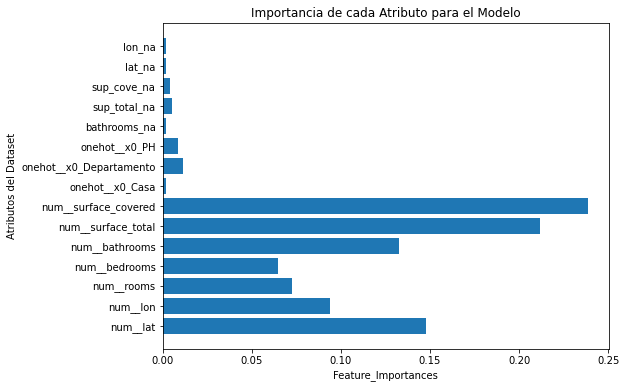

In [81]:
print(rf_best.named_steps['reg'].feature_importances_)

plt.figure(figsize=(8,6))
plt.barh(col, rf_best.named_steps['reg'].feature_importances_) 
plt.xlabel('Feature_Importances')
plt.ylabel('Atributos del Dataset')
plt.title('Importancia de cada Atributo para el Modelo')
plt.show()


*Podemos observar que la variable `num__surface_covered` tiene una importancia de casi un 25% para el modelo (23.8%), seguido por `num__surface_total` con 21.1%, luego `num__lat` con 14.7%, `num__bathrooms` con 13.2%, `num__lon` con 9.3%.*  
*Las variables `num_rooms` y `num_bedrooms` aportan su cuota de importancia con un 7.2% y 6.4% respectivamente.*  
*Las variables restantes son muy poco importantes para el modelo, con valores cercanos al 1%, incluso menores.*

<ipython-input-82-3a36f216a355>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(filas, 2, i+1)


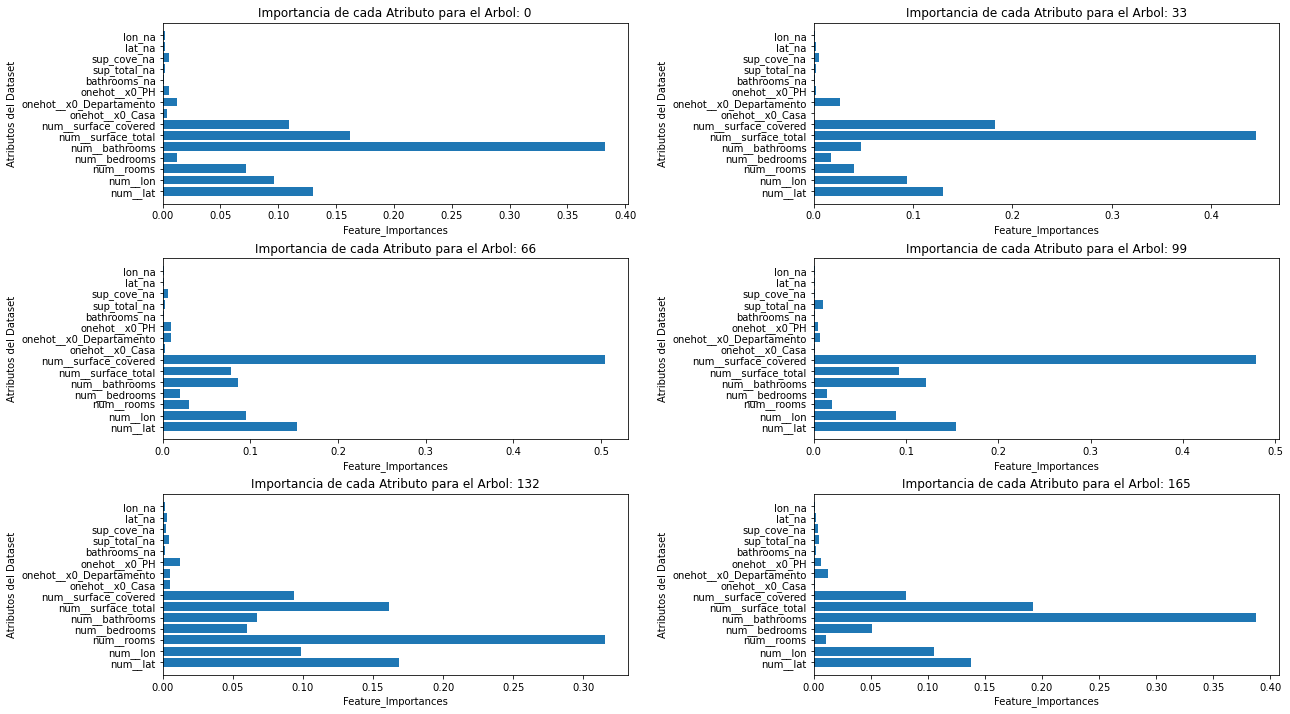

In [82]:
# Analisis sobre 6 arboles

plt.figure(figsize=(20,12))
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.4)

n_graficos = 6
filas = (n_graficos/2)
salto_arbol = 33

for i in np.arange(0, n_graficos):
    plt.subplot(filas, 2, i+1)
    plt.barh(col, rf_best.named_steps['reg'].estimators_[i * salto_arbol].feature_importances_)
    plt.xlabel('Feature_Importances')
    plt.ylabel('Atributos del Dataset')
    plt.title('Importancia de cada Atributo para el Arbol: ' + str(i * salto_arbol))

plt.show()

*Al analizar la importancia de los atributos en 6 diferentes árboles, nos encontramos con que la variable más predictiva esta entre `num__surface_total`, `num__surface_covered`, `num_rooms` y `num_bathrooms`, con un índice de importancia muy importante en todos los casos superior al 30%.*  
*El grupo en sí de variables más predictoras siempre ronda las 7 variables comentadas en el apartado anterior.*  
*Además, los atributos con poca incidencia en las predicciones siempre son los mismos también.*


*Podemos concluir que las variables más importantes para el modelo es la superficie Cubierta y superficie Total, y esto tiene sentido. Es decir, independientemente de cuántos ambientes tiene la propiedad, cuántos baños, donde esté ubicada, el tipo de propiedad que sea, o cualquier otro atributo, el precio va a estar influenciado por la cantidad de superficie edificada y por el tamaño del terreno que tenga esa propiedad.*  
*En un segundo escalón tenemos como variables importantes la Latitud, que nos ayuda a codificar en donde está ubicada esa propiedad; y la cantidad de la de Baños, ya que el baño representa un ambiente que puede influenciar fuertemente en el precio de una propiedad.*  
*En un tercer escalón aparecen la Longitud, que también nos ayuda a codificar donde está ubicada la propiedad, y luego la cantidad de Habitaciones y Ambientes que tienen. Este grupo de variables aportan su cuota de importancia para las predicciones.*  


### Los Errores

Volvamos a evaluar el modelo una vez más, y analisemos los gráficos.

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'rooms',
                                                   'bedrooms', 'bathrooms',
                                                   'surface_total',
                                                   'surface_covered']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type'])])),
                ('reg',
                 RandomForestRegress

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


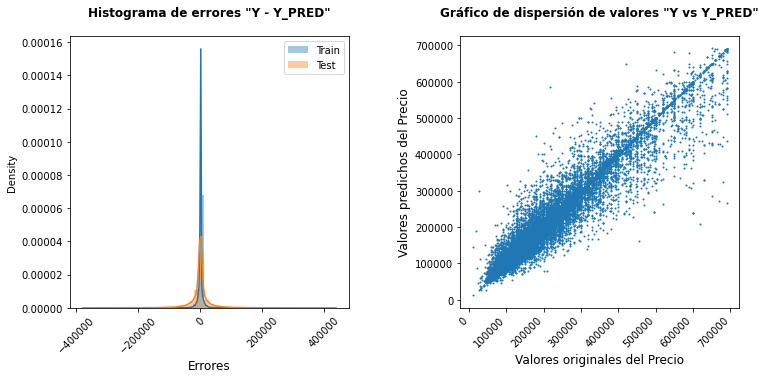

In [83]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_best)

*Volvemos a destacar que el modelo general presenta un muy buen desempeño, con un R2 superior al 92.3%. Recordemos también que estamos utilizando un modelo de los más robustos que existen actualmente.*  
*Analizando el Histograma de errores Y - Y_PRED, encontramos una gráfica centrada en 0, pero con una dispersión de valores, principalmente para el dataset de Test.*  
*Notemos también que al mirar la gráfica de Dispersión de valores Y vs P_PRED, si bien los puntos se ajustan bastante a la diagonal (la cual representa Error = 0), vemos que los valores forman más bien una nube de puntos alrededor de la misma. En particular, cuando el precio supera los 40000 aproximadamente, la dispersión aumenta, la nube de puntos no es tan densa, y empiezan a aparecer más valores predichos por debajo del valor original.  
Recordemos que al comenzar este proyecto la variable `precio` fue la primera que ajustamos. Esta variable originalmente tenía una dispersión muy alta, y luego de ajustarla no conseguimos una distribución normal “perfecta”, sino que presentaba una cola de valores a la derecha (valores altos). Puede ser que esta elección este provocando que nuestra muestra no sea representativa de la población, produciendo que el modelo no sea muy buen estimador para valores de precio algo elevados.*


*En general creo que se obtuvo un buen modelo, con buen desempeño. Se trabajaron y ajustaron las variables del dataset a conciencia, tratando de conseguir la mayor cantidad de datos posibles, con un buen criterio de imputación, transformación y ajuste.*  
*Me gustaría poder probar el modelo con un dataset con valores completamente nuevos, siempre teniendo en cuenta propiedades de Capital Federal, y que sean del tipo Casa Departamento y PH.*  
*Como mejora a futuro, se podría probar algún otro criterio de imputación de las variables numéricas, alguna técnica que nos ayude a ajustar mejor que StandardScaler variables que tengan una distribución con cola hacia la derecha.*  
*También se podría hacer uso de un reductor de dimensiones antes de modelar, ya que las variables que aportan importancia al momento de predecir no son más de 7 en total.*


---

<br />

## Anexo: Análisis y comparación utilizando otras transformaciones
<br />

---


Realicemos ahora un análisis donde utilicemos técnicas de tratamiento de Outliers, Valores Faltantes y Encoding más convencionales.
Vamos a aplicar la técnica de los 3-Sigmas para quitar Outliers en las variables `precio`, `surface_total` y `surface_covered`. Además, los Valores Faltantes vamos a imputarlos en `lat`, `lon` y `bathrooms` con la Moda de estos atributos. Finalmente, vamos a realizar un Encoding de la variable categórica `property_type`.


Empecemos:
* cargando el dataset nuevamente.
* quedándonos con propiedades de Capital Federal, del tipo Departamento, PH y Casa.
* mostremos la cantidad de valores nulos y la información estadística del dataset.


In [84]:
df_o = pd.read_csv('/home/alex/Documents/DS-Online-59/Proyectos/DS_Proyecto_01_Datos_Properati.csv')
df = df_o.copy()

print('El tamaño del dataset origianl es: ', df.shape)

El tamaño del dataset origianl es:  (146660, 19)


In [85]:
col_drop = ['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 'description', 'operation_type']
df = df.drop(columns=col_drop)

df = df[((df.property_type == 'Departamento') | (df.property_type == 'Casa') | (df.property_type == 'PH')) & (df.l2 == 'Capital Federal')]

col_drop = ['l2']
df = df.drop(columns=col_drop)

print('El tamaño del dataset luego de filtra es: ', df.shape)


El tamaño del dataset luego de filtra es:  (91485, 10)


In [86]:
print('Veamos valores nulos y datos estadísticos del dataset:')
print('\n')
print('Valores Nulos: ')
print(df.isnull().sum())
print('\n')
print('Datos estadísticos: ')
print(df.describe(include=np.object))
print(df.describe())


Veamos valores nulos y datos estadísticos del dataset:


Valores Nulos: 
lat                4534
lon                4548
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


Datos estadísticos: 
             l3 property_type
count     91485         91485
unique       57             3
top     Palermo  Departamento
freq      13007         79029
                lat           lon         rooms      bedrooms     bathrooms  \
count  86951.000000  86937.000000  91485.000000  91485.000000  89314.000000   
mean     -34.599081    -58.436002      2.964278      1.960278      1.560147   
std        0.023957      0.036297      1.314704      1.072946      0.860309   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.613757    -58.459605      2.000000      1.000000      1.000000   
50%      -34.599446    -58.

  
Apliquemos la regla de las 3-Sigmas en las variables `precio`, `surface_total` y `surface_covered`, ya que presentan una alta dispersión de valores.
  

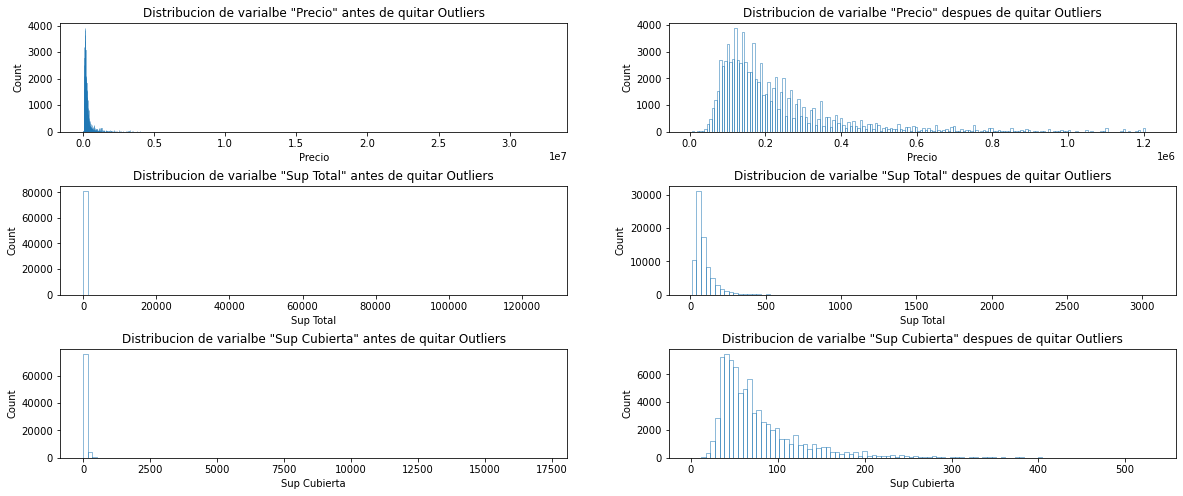

In [87]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(3,2,1)
sns.histplot(data=df, x='price', fill=False)
plt.xlabel('Precio')
plt.title('Distribucion de varialbe "Precio" antes de quitar Outliers')

valor_medio = df.price.mean()
std = df.price.std()
df['price_aux'] = (df.price - valor_medio) / std
df = df[(df.price_aux > -3) & (df.price_aux < 3)]
df = df.drop(columns= ['price_aux'])

plt.subplot(3,2,2)
sns.histplot(data=df, x='price', fill=False)
plt.xlabel('Precio')
plt.title('Distribucion de varialbe "Precio" despues de quitar Outliers')

#--------------------------------------------------------------------------------------

plt.subplot(3,2,3)
sns.histplot(data=df, x='surface_total', bins=100, fill=False)
plt.xlabel('Sup Total')
plt.title('Distribucion de varialbe "Sup Total" antes de quitar Outliers')

valor_medio = df.surface_total.mean()
std = df.surface_total.std()
df['surface_total_aux'] = (df.surface_total - valor_medio) / std
df = df[(df.surface_total_aux > -3) & (df.surface_total_aux < 3)]
df = df.drop(columns= ['surface_total_aux'])

plt.subplot(3,2,4)
sns.histplot(data=df, x='surface_total', bins=100, fill=False)
plt.xlabel('Sup Total')
plt.title('Distribucion de varialbe "Sup Total" despues de quitar Outliers')

#--------------------------------------------------------------------------------------

plt.subplot(3,2,5)
sns.histplot(data=df, x='surface_covered', bins=100, fill=False)
plt.xlabel('Sup Cubierta')
plt.title('Distribucion de varialbe "Sup Cubierta" antes de quitar Outliers')


valor_medio = df.surface_covered.mean()
std = df.surface_covered.std()
df['surface_covered_aux'] = (df.surface_covered - valor_medio) / std
df = df[(df.surface_covered_aux > -3) & (df.surface_covered_aux < 3)]
df = df.drop(columns= ['surface_covered_aux'])


plt.subplot(3,2,6)
sns.histplot(data=df, x='surface_covered', bins=100, fill=False)
plt.xlabel('Sup Cubierta')
plt.title('Distribucion de varialbe "Sup Cubierta" despues de quitar Outliers')

plt.show()

In [88]:
print('El tamaño del dataset luego de ajustar es: ', df.shape)

El tamaño del dataset luego de ajustar es:  (80238, 10)


*Podemos observar que:*  
* *luego del tratamiento de Outliers no obtenemos una distribución normal para ninguna de las 3 variables, aún hay una cola de valores hacia la derecha. Algo similar obtuvimos en el análisis de la Parte A.*  
* *nos quedamos con un dataset algo más pequeño de unas 80.000 filas, contra las 83.000 filas obtenidas en el análisis de la Parte A.*  


Para el tratamiento de los Valores Nulos y Encoding vamos a utilizar los métodos de ScikitLearn, junto con Pipeline.  
Las variables que aún presentan valores nulos son `lat`, `lon` y `bathrooms`, las cuales vamos a imputarlas con la Moda.
Para variables categóricas, la única que vamos a codificar con OneHotEncoder es `property_type`, ya que vamos a descartar `l3` como se realizó en apartados anteriores, para realizar una comparación más justa entre los resultados a analizar.  


En cuanto al modelo a utilizar vamos a tomar el mejor obtenido en el análisis anterior, es un RamdomForest con los parámetros: "n_estimators = 200", "max_features = sqrt" y "bootstrap = False"


In [89]:
print('Veamos valores nulos y datos estadísticos del dataset:')
print('\n')
print('Valores Nulos: ')
print(df.isnull().sum())


Veamos valores nulos y datos estadísticos del dataset:


Valores Nulos: 
lat                3984
lon                3984
l3                    0
rooms                 0
bedrooms              0
bathrooms           833
surface_total         0
surface_covered       0
price                 0
property_type         0
dtype: int64


In [90]:
X = df.drop(columns=['price', 'l3'])
print(X.shape)

y = df.price
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X.property_type, random_state=1)

(80238, 8)
(80238,)


In [91]:
num_t_mo = Pipeline(steps=[
    ('moda', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('scaler', StandardScaler())])

cat_t = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [92]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num1', num_t_mo, ['lat', 'lon', 'bathrooms']),
        ('cat', cat_t, ['property_type'])
        ],
    remainder='passthrough')

In [93]:
################################################################################################
#                                   RamdomForest                                               #
################################################################################################

rf_r = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', RandomForestRegressor(n_estimators=200, max_features='sqrt', bootstrap=False, random_state=1))])

Modelo a evaluar: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num1',
                                                  Pipeline(steps=[('moda',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'lon', 'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['prope

/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alex/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


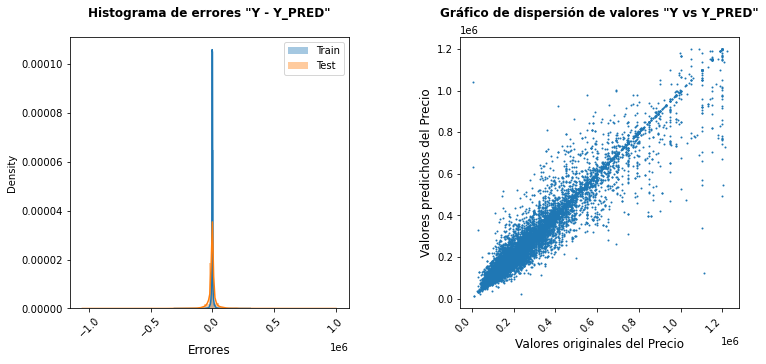

In [94]:
evaluacion_modelo(X_train, X_test, y_train, y_test, rf_r)

*Como conclusiones podemos decir que el modelo sigue presentando un gran desempeño, con un R2 superior al 92%, pero hay que destacar un RMSE mayor al obtenido en los apartados anteriores. Vemos un valor de 45.700, contra los 32.700 obtenidos con el mismo modelo pero un dataset con un tratamiento diferente.*  
*Si repasamos los errores con la ayuda de las gráficas, para el Histograma de errores y - Y_PRED tenemos una gráfica centrada en 0 y con dispersión de valores para el dataset de Test. Si repasamos el Grafico de dispersion de valores Y vs Y_PRED notamos al mismo comportamiento obtenido anteriormente, para valores mayores a 400.000 la nube de puntos ya no es tan densa, también se destaca que en esta zona el modelo predice valores por debajo de los reales, y adicionalmente mente, vemos que aparecen zonas de puntos alineados de manera vertical.  
Este último efecto está siendo ocasionado por las imputaciones realizadas, donde se imputaron casi 4000 valores de Latitud y Longitud con un único valor (la moda), sin tener en cuenta ninguna otra consideración (como si fue realizado en apartados anteriores).*  

*En resumen, con este nuevo dataset ajustado con otras técnicas de tratamiento de Outliers, Valores Faltantes y Encoding, nos encontramos con un muy buen desempeño del modelo, pero aumentamos el valor del RMSE, y aparece un efecto de agrupación vertical al comparar valores Y vs Y_PRED.*
